<a href="https://colab.research.google.com/github/pavanitanmayasri/Prodigy-InfoTech-DataScience-Internship-task-4/blob/main/Prodigy_DS_Task04_Social_Media_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
df = pd.read_csv("twitter_training.csv", header=None)
df.columns = ['id', 'topic', 'sentiment', 'text']


In [ ]:
df.head()

,id,topic,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df.shape

(74682, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   topic      74682 non-null  object
 2   sentiment  74682 non-null  object
 3   text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
df.describe()

,id
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [ ]:
df.isnull().sum()


,0
id,0
topic,0
sentiment,0
text,686


In [ ]:
df = df.dropna(subset=['text'])


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    return text


In [ ]:
df['clean_text'] = df['text'].apply(clean_text)


In [ ]:
df['sentiment'].value_counts()


,count
sentiment,
Negative,22358
Positive,20655
Neutral,18108
Irrelevant,12875


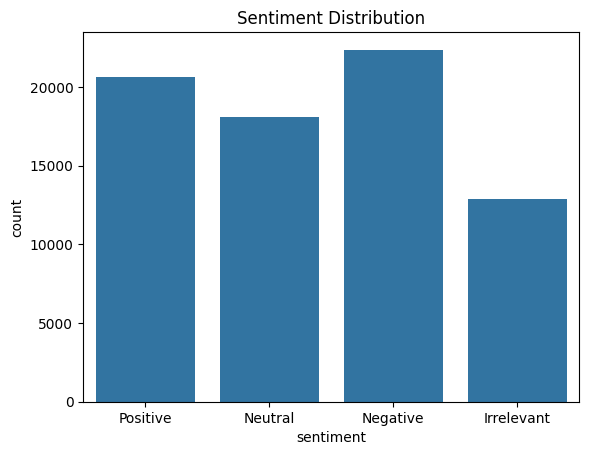

In [ ]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()


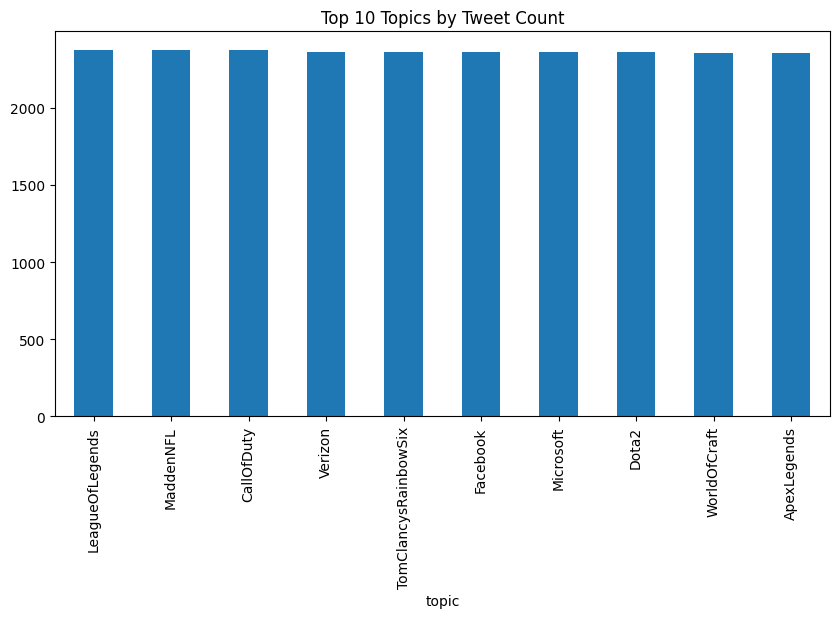

In [ ]:
plt.figure(figsize=(10,5))
df['topic'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Topics by Tweet Count")
plt.show()


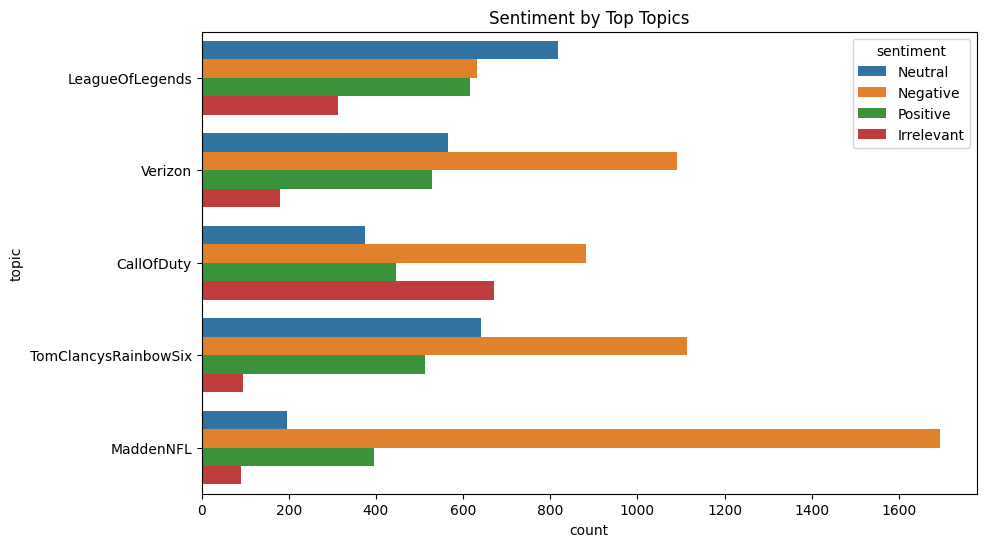

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y='topic', hue='sentiment',
              data=df[df['topic'].isin(df['topic'].value_counts().head(5).index)])
plt.title("Sentiment by Top Topics")
plt.show()


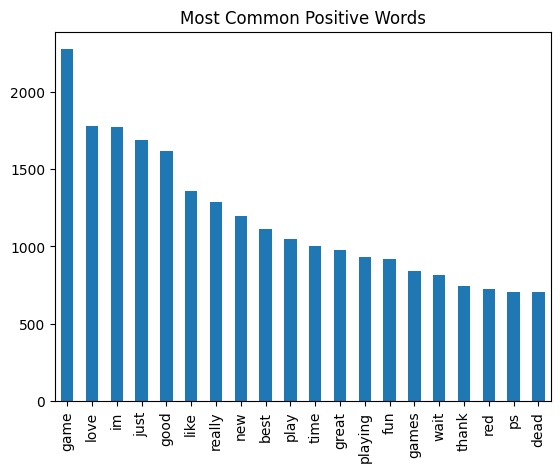

In [ ]:
positive_text = df[df['sentiment'] == 'Positive']['clean_text']

vectorizer = CountVectorizer(stop_words='english', max_features=20)
positive_words = vectorizer.fit_transform(positive_text)

word_freq = pd.DataFrame(
    positive_words.toarray().sum(axis=0),
    index=vectorizer.get_feature_names_out(),
    columns=['frequency']
).sort_values(by='frequency', ascending=False)

word_freq.plot(kind='bar', legend=False)
plt.title("Most Common Positive Words")
plt.show()


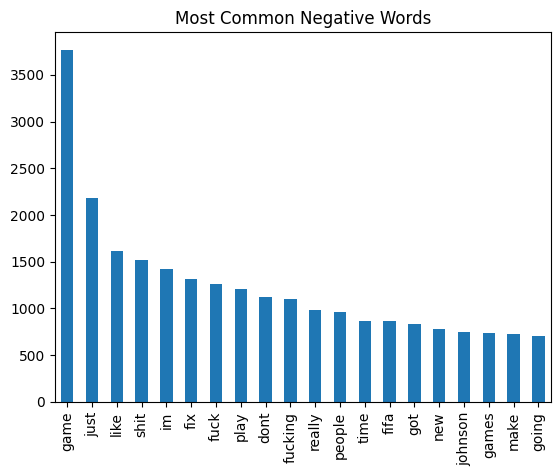

In [ ]:
negative_text = df[df['sentiment'] == 'Negative']['clean_text']

vectorizer = CountVectorizer(stop_words='english', max_features=20)
negative_words = vectorizer.fit_transform(negative_text)

word_freq = pd.DataFrame(
    negative_words.toarray().sum(axis=0),
    index=vectorizer.get_feature_names_out(),
    columns=['frequency']
).sort_values(by='frequency', ascending=False)

word_freq.plot(kind='bar', legend=False)
plt.title("Most Common Negative Words")
plt.show()
